In [2]:
import dimod

size = 4
lagrange = size ** 2

# Creamos el modelo QUBO
Q = {}

# Añadimos el primer bloque de la función objetivo (una reina por casilla)
for i in range(size):
    for j in range(size):
        Q[(f"x_{i}_{j}", f"x_{i}_{j}")] = -1  # Maximizar la presencia de reinas

# Incluimos las restricciones para que no haya ataques entre reinas
for i1 in range(size):
    for i2 in range(size):
        for i3 in range(size):
            for i4 in range(size):
                if i1 == i3 or i2 == i4 or i1 - i3 == i2 - i4 or i1 - i3 == i4 - i2:
                    if not (i1 == i3 and i2 == i4):
                        Q[(f"x_{i1}_{i2}", f"x_{i3}_{i4}")] = lagrange

# Resolver el QUBO con recocido simulado
sampler = dimod.SimulatedAnnealingSampler()
sampleset = sampler.sample_qubo(Q, num_reads=2000)

# Extraemos la mejor solución encontrada
solution = sampleset.first.sample

# Imprimimos la solución en formato de tablero
for i in range(size):
    for j in range(size):
        if solution[f"x_{i}_{j}"] == 0:
            print("O", end=" ")
        else:
            print("X", end=" ")
    print()


O O X O O O 
O O O O O X 
O X O O O O 
O O O O X O 
X O O O O O 
O O O X O O 


In [14]:
import dimod
from itertools import product
import time
size = 4
lagrange = size ** 2
num_reads=2000
# Creamos el modelo QUBO
Q = {}

# Parte de la función objetivo: poner reinas
for i in range(size):
    for j in range(size):
        Q[(f"x_{i}_{j}", f"x_{i}_{j}")] = -1

# Restricciones: sin ataques
for i1 in range(size):
    for i2 in range(size):
        for i3 in range(size):
            for i4 in range(size):
                if i1 == i3 or i2 == i4 or i1 - i3 == i2 - i4 or i1 - i3 == i4 - i2:
                    if not (i1 == i3 and i2 == i4):
                        Q[(f"x_{i1}_{i2}", f"x_{i3}_{i4}")] = lagrange

# Ejecutar el recocido simulado
sampler = dimod.SimulatedAnnealingSampler()
start_time = time.time()
sampleset = sampler.sample_qubo(Q, num_reads=num_reads)
end_time = time.time()

# --- Calcular t_sample en milisegundos ---
total_time_ms = (end_time - start_time) * 1000  # convertir a milisegundos
t_sample = total_time_ms / num_reads

print(f"Tiempo total: {total_time_ms:.2f} ms")
print(f"Tiempo por lectura (t_sample): {t_sample:.4f} ms")

Tiempo total: 109762.41 ms
Tiempo por lectura (t_sample): 54.8812 ms


In [15]:
print(sampleset)

     x_0_0 x_0_1 x_0_2 x_0_3 x_1_0 x_1_1 x_1_2 x_1_3 ... x_3_3 energy num_oc.
1        0     1     0     0     0     0     0     1 ...     0   -4.0       1
5        0     0     1     0     1     0     0     0 ...     0   -4.0       1
6        0     1     0     0     0     0     0     1 ...     0   -4.0       1
7        0     0     1     0     1     0     0     0 ...     0   -4.0       1
9        0     1     0     0     0     0     0     1 ...     0   -4.0       1
10       0     1     0     0     0     0     0     1 ...     0   -4.0       1
12       0     0     1     0     1     0     0     0 ...     0   -4.0       1
13       0     1     0     0     0     0     0     1 ...     0   -4.0       1
14       0     1     0     0     0     0     0     1 ...     0   -4.0       1
17       0     0     1     0     1     0     0     0 ...     0   -4.0       1
18       0     1     0     0     0     0     0     1 ...     0   -4.0       1
19       0     0     1     0     1     0     0     0 ...     0  

In [16]:
from itertools import product
from tabulate import tabulate

# Número de variables binarias (una por celda del tablero)
num_variables = size ** 2

# Generar todas las combinaciones posibles de bits para un tablero de size x size
all_combinations = list(product([0, 1], repeat=num_variables))

# Crear un diccionario para contar las ocurrencias
count_dict = {comb: 0 for comb in all_combinations}

# Recorrer las muestras y contar ocurrencias
for sample in sampleset.record:
    bitstring = tuple(int(bit) for bit in sample[0])  # sample[0] contiene los bits
    count = sample[2]  # sample[2] es num_occurrences
    count_dict[bitstring] += count

# Mostrar tabla con todas las combinaciones observadas (omitimos las de conteo 0)
table_data = [[comb, count] for comb, count in count_dict.items() if count > 0]

print("\nConteo de todas las combinaciones:")
print(tabulate(table_data, headers=["Combinación", "Conteo"], tablefmt="pretty"))


Conteo de todas las combinaciones:
+--------------------------------------------------+--------+
|                   Combinación                    | Conteo |
+--------------------------------------------------+--------+
| (0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1) |   77   |
| (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0) |   42   |
| (0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0) |   34   |
| (0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0) |   31   |
| (0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0) |   30   |
| (0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0) |   51   |
| (0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0) |   33   |
| (0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1) |   38   |
| (0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1) |   23   |
| (0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0) |  340   |
| (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0) |  108   |
| (0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1) |   59   |
| (0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0

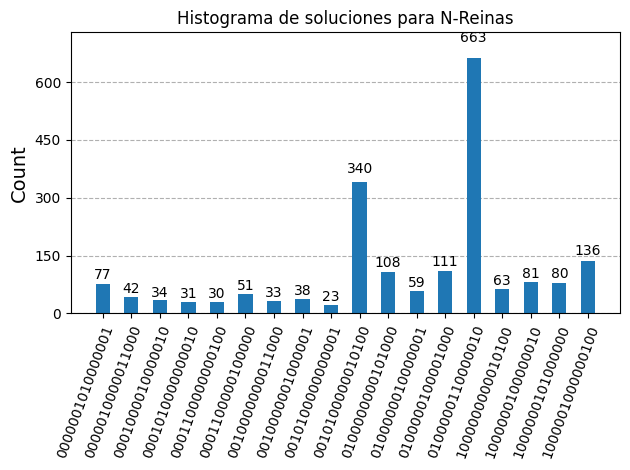

In [17]:
from qiskit.visualization import plot_histogram

# Formatear los datos para Qiskit (bitstring en orden)
formatted_counts = {"".join(map(str, comb)): count for comb, count in count_dict.items() if count > 0}

# Dibujar histograma
plot_histogram(formatted_counts, title="Histograma de soluciones para N-Reinas")


In [18]:

# Extraemos la mejor solución encontrada
solution = sampleset.first.sample

# Imprimimos la solución en formato de tablero
for i in range(size):
    for j in range(size):
        if solution[f"x_{i}_{j}"] == 0:
            print("O", end=" ")
        else:
            print("X", end=" ")
    print()


O O X O 
X O O O 
O O O X 
O X O O 


In [19]:
import numpy as np
import pandas as pd

# --- Función para validar si una solución cumple con las reglas de N-Reinas ---
def is_valid_n_queens(sol, size):
    try:
        board = [(i, sol[i*size:(i+1)*size].index(1)) for i in range(size)]
    except ValueError:
        return False  # Hay filas sin reina
    seen_cols = set()
    seen_diag1 = set()
    seen_diag2 = set()
    for r, c in board:
        if c in seen_cols or (r - c) in seen_diag1 or (r + c) in seen_diag2:
            return False
        seen_cols.add(c)
        seen_diag1.add(r - c)
        seen_diag2.add(r + c)
    return True

# --- Identificar soluciones óptimas ---
opt_solutions = [s for s in count_dict if sum(s) == size and is_valid_n_queens(s, size)]

# --- Calcular métricas P_GS y TTS ---
def calculate_P_GS_and_TTS(count_dict, opt_states, t_sample):
    success_counts = sum(count_dict[state] for state in opt_states)
    total_counts = sum(count_dict.values())
    p_gs = success_counts / total_counts
    if p_gs == 1.0:
        tts = t_sample
    elif p_gs == 0:
        tts = float("inf")
    else:
        tts = t_sample * (np.log(1 - 0.99) / np.log(1 - p_gs))
    return p_gs, tts

# --- Calcular y mostrar métricas ---
p_gs, tts = calculate_P_GS_and_TTS(count_dict, opt_solutions, t_sample)

df = pd.DataFrame({
    "Instance": [f"{size}-Queens"],
    "P_GS": [p_gs],
    "t_sample (ms)": [t_sample],
    "TTS (ms)": [tts]
})
df


,Instance,P_GS,t_sample (ms),TTS (ms)
0,4-Queens,0.5015,54.881204,363.049154


In [1]:
import dimod

size = 4
lagrange = size ** 2

# Creamos el modelo QUBO
Q = {}

# Añadimos el primer bloque de la función objetivo (una reina por casilla)
for i in range(size):
    for j in range(size):
        Q[(f"x_{i}_{j}", f"x_{i}_{j}")] = -1  # Maximizar la presencia de reinas

# Incluimos las restricciones para que no haya ataques entre reinas
for i1 in range(size):
    for i2 in range(size):
        for i3 in range(size):
            for i4 in range(size):
                if i1 == i3 or i2 == i4 or i1 - i3 == i2 - i4 or i1 - i3 == i4 - i2:
                    if not (i1 == i3 and i2 == i4):
                        Q[(f"x_{i1}_{i2}", f"x_{i3}_{i4}")] = lagrange

# Resolver el QUBO con recocido simulado
sampler = dimod.SimulatedAnnealingSampler()
sampleset = sampler.sample_qubo(Q, num_reads=2000)

# Extraemos la mejor solución encontrada
solution = sampleset.first.sample

# Imprimimos la solución en formato de tablero
for i in range(size):
    for j in range(size):
        if solution[f"x_{i}_{j}"] == 0:
            print("O", end=" ")
        else:
            print("X", end=" ")
    print()


O X O O 
O O O X 
X O O O 
O O X O 


In [1]:
import numpy as np
import dimod

# Configurar el tamaño del tablero de N reinas
size = 6
lagrange = size ** 2

# Función para convertir índices (i, j) a un índice lineal
def to_linear_index(i, j, size):
    return i * size + j

# Crear una matriz QUBO simétrica
num_variables = size * size
Q_matrix = np.zeros((num_variables, num_variables))

# Llenar la matriz QUBO siguiendo las mismas reglas que en dimod
for i in range(size):
    for j in range(size):
        linear_idx = to_linear_index(i, j, size)
        Q_matrix[linear_idx, linear_idx] = -1 

for i1 in range(size):
    for j1 in range(size):
        for i2 in range(size):
            for j2 in range(size):
                if (i1 == i2 or j1 == j2 or abs(i1 - i2) == abs(j1 - j2)) and not (i1 == i2 and j1 == j2):
                    idx1 = to_linear_index(i1, j1, size)
                    idx2 = to_linear_index(i2, j2, size)
                    # Asegurar simetría: Q[idx1, idx2] = Q[idx2, idx1] = lagrange
                    Q_matrix[idx1, idx2] += lagrange
                    Q_matrix[idx2, idx1] += lagrange  # <--- Esto garantiza simetría

# Verificar simetría
print("Matriz QUBO es simétrica:", np.allclose(Q_matrix, Q_matrix.T))


# Simular QCI usando dimod

# Convertir la matriz QUBO a un diccionario de dimod
Q_dict = {}
for i in range(num_variables):
    for j in range(num_variables):
        if Q_matrix[i, j] != 0:
            Q_dict[(i, j)] = Q_matrix[i, j]

# Resolver el QUBO con recocido simulado
sampler = dimod.SimulatedAnnealingSampler()
sampleset = sampler.sample_qubo(Q_dict, num_reads=2000)

# Extraer la mejor solución
solution = sampleset.first.sample

# Convertir la solución a un tablero de reinas
queens = np.zeros((size, size), dtype=int)
for i in range(size):
    for j in range(size):
        linear_idx = to_linear_index(i, j, size)
        queens[i, j] = solution[linear_idx]

# Imprimir el tablero
print("Solución encontrada:")
for row in queens:
    print(" ".join("X" if cell == 1 else "." for cell in row))

# Verificar si la solución es válida
def is_valid_solution(queens, size):
    for i in range(size):
        for j in range(size):
            if queens[i, j] == 1:
                # Verificar misma fila
                if sum(queens[i, :]) > 1:
                    return False
                # Verificar misma columna
                if sum(queens[:, j]) > 1:
                    return False
                # Verificar diagonales
                for k in range(1, size):
                    if i + k < size and j + k < size and queens[i + k, j + k] == 1:
                        return False
                    if i - k >= 0 and j - k >= 0 and queens[i - k, j - k] == 1:
                        return False
                    if i + k < size and j - k >= 0 and queens[i + k, j - k] == 1:
                        return False
                    if i - k >= 0 and j + k < size and queens[i - k, j + k] == 1:
                        return False
    return True

# Verificar si la solución es válida
if is_valid_solution(queens, size):
    print("La solución es válida.")
else:
    print("La solución no es válida.")

Matriz QUBO es simétrica: True
Solución encontrada:
. X . .
. . . X
X . . .
. . X .
La solución es válida.


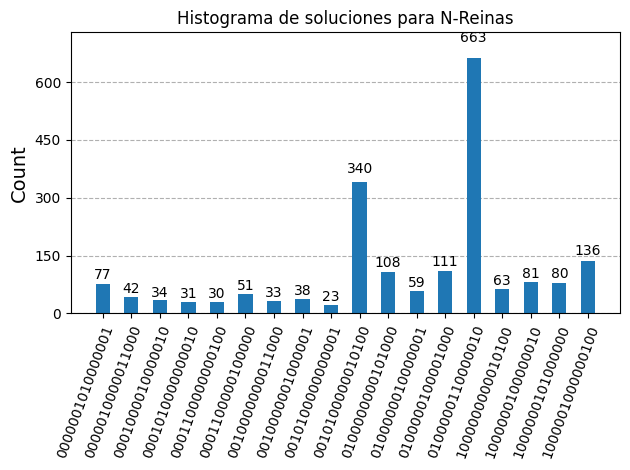

In [20]:
from qiskit.visualization import plot_histogram

# Formatear los datos para Qiskit (bitstring en orden)
formatted_counts = {"".join(map(str, comb)): count for comb, count in count_dict.items() if count > 0}

# Dibujar histograma
plot_histogram(formatted_counts, title="Histograma de soluciones para N-Reinas",figsize=(20, 8))


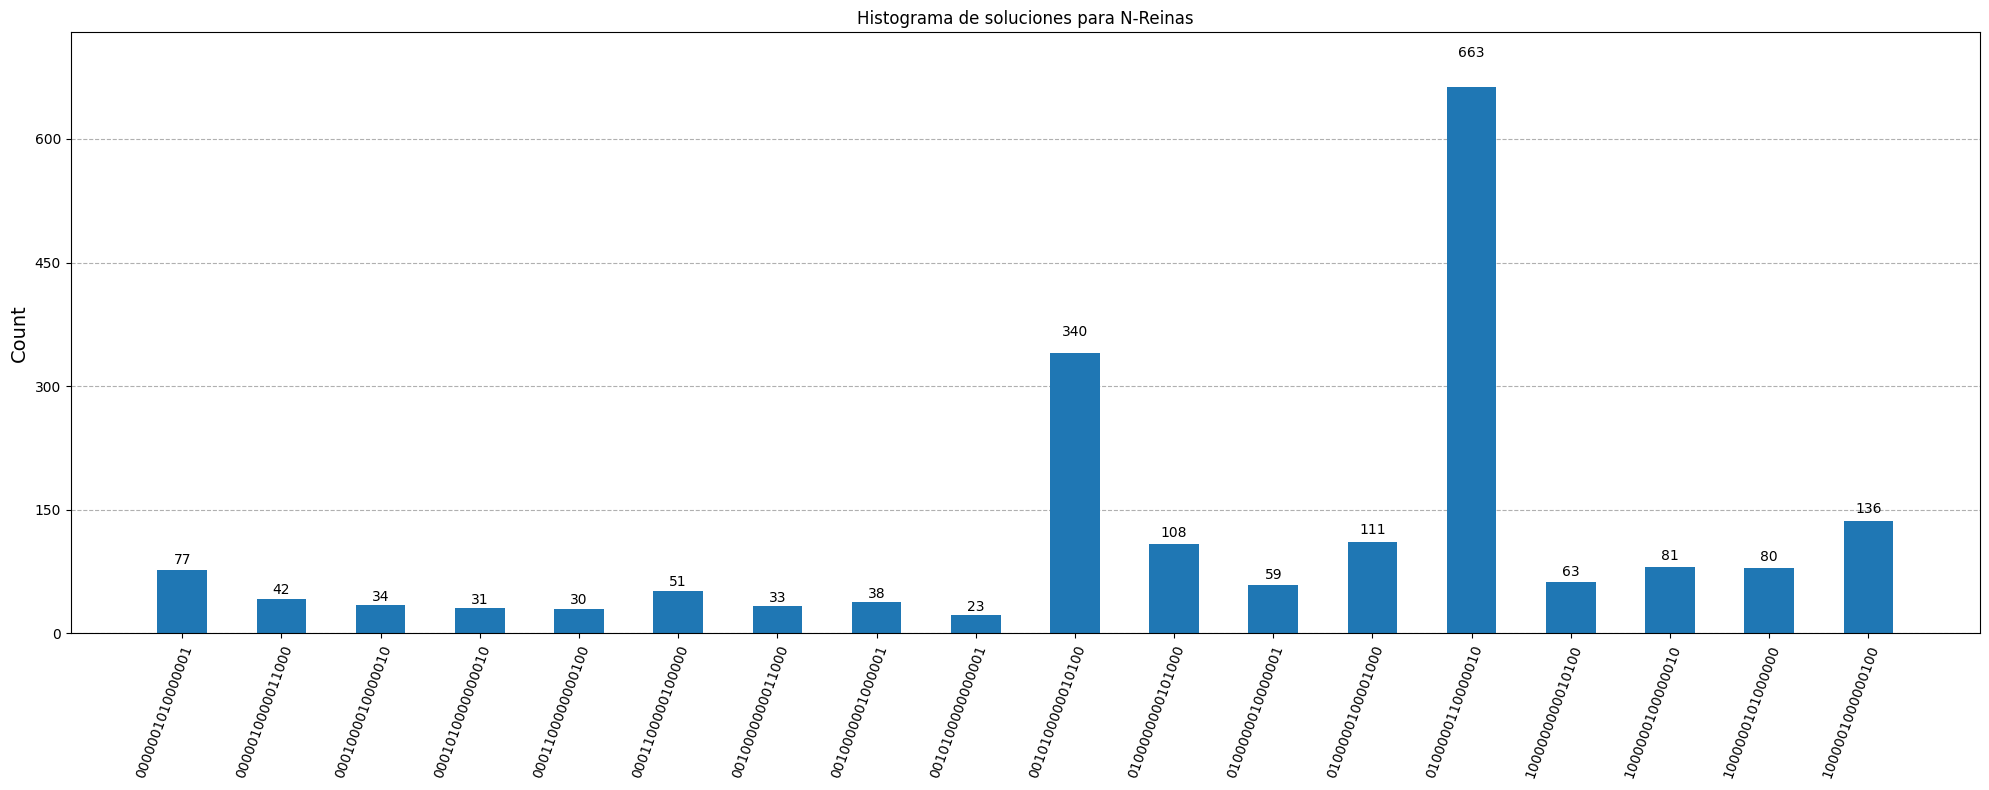

In [21]:
from qiskit.visualization import plot_histogram

# Formatear los datos para Qiskit (bitstring en orden)
formatted_counts = {"".join(map(str, comb)): count for comb, count in count_dict.items() if count > 0}

# Dibujar histograma
plot_histogram(formatted_counts, title="Histograma de soluciones para N-Reinas",figsize=(20, 8))